In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv')

In [ ]:
#PRINTING THE DATASET

In [4]:
print(data.head())

shape = data.shape
print("Shape of the dataset:", shape)

  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  
Shape of the dataset

In [6]:
print(data.isna().sum())

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [7]:
print(data.dtypes)

MONTH        object
STORECODE    object
QTY           int64
VALUE         int64
GRP          object
SGRP         object
SSGRP        object
CMP          object
MBRD         object
BRD          object
dtype: object


In [8]:
print(data.describe())

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


In [9]:
new_working_data = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv')

In [ ]:
#REMOVING NULL VALUES

In [10]:
new_working_data = new_working_data[(new_working_data['PRICE']!=0)&(new_working_data['VALUE']!=0)&(new_working_data['BILL_AMT']!=0)]
print(new_working_data)

      MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2        

In [ ]:
#REMOVING DUPLICATE VALUES

In [11]:
new_working_data = new_working_data.loc[~new_working_data.duplicated()]
print(new_working_data)

      MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2        

In [12]:
columns_to_remove = ['SGRP', 'SSGRP']  # Add as many column names as needed

# Drop the specified columns
data_without_columns = new_working_data.drop(columns=columns_to_remove)
print(data_without_columns)

      MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     CMP              MBRD  \
0            BUTTER MARGR  (4/94)               G C M M F              AMUL   
1         CONFECTIONERY - ECLAIRS    

Text(0, 0.5, 'COUNT')

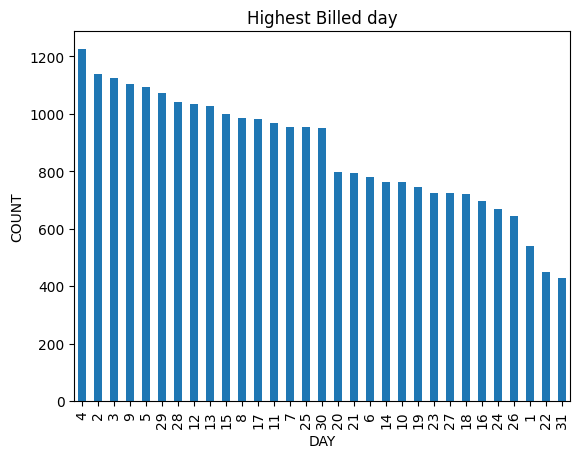

In [15]:
ax = data_without_columns['DAY'].value_counts()\
.plot(kind="bar",title='Highest Billed day')
ax.set_label("DAY")
ax.set_ylabel("COUNT")

In [ ]:
#SALES PERCENT BASED ON MONTH

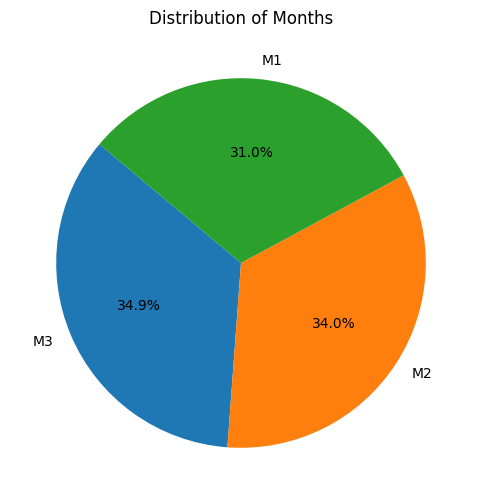

In [16]:
month_counts = data_without_columns['MONTH'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Months')

# Show the plot
plt.show()

In [ ]:
#TOP SELLED STORE

Text(0, 0.5, 'Count')

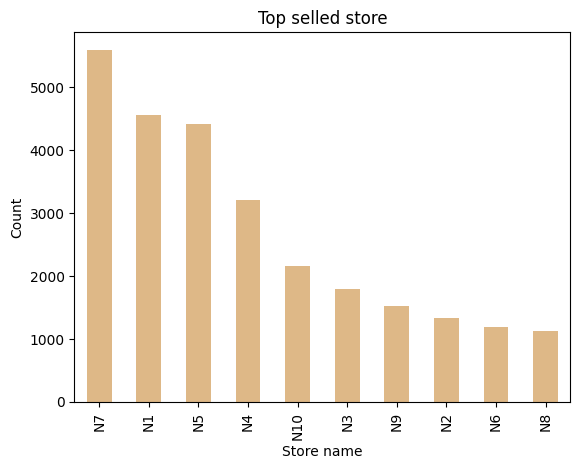

In [18]:
dx = new_working_data['STORECODE'].value_counts()\
.plot(kind='bar',title = 'Top selled store',color='burlywood')
dx.set_xlabel('Store name')
dx.set_ylabel('Count')

In [ ]:
#PLOTTING FOR DAY AND THE BILL AMOUNT

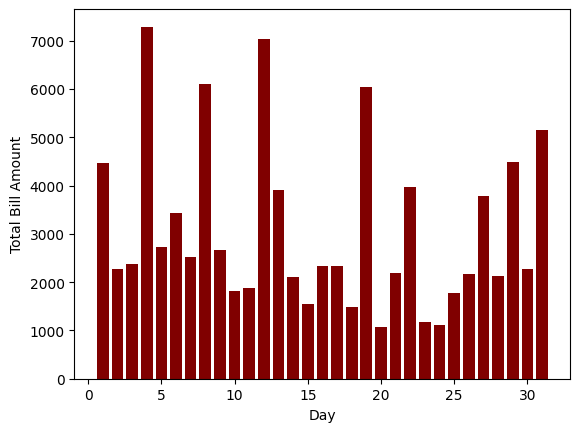

In [59]:
xaxis=new_working_data['DAY'].astype(int)
yaxis=new_working_data['BILL_AMT'].astype(int)

barlist=plt.bar(xaxis,yaxis,color='maroon')

# Adding labels to the x-axis and y-axis
plt.xlabel('Day')
plt.ylabel('Total Bill Amount')

# Displaying the plot
plt.show()

In [ ]:
#BILL AMOUNT BY EACH STORES

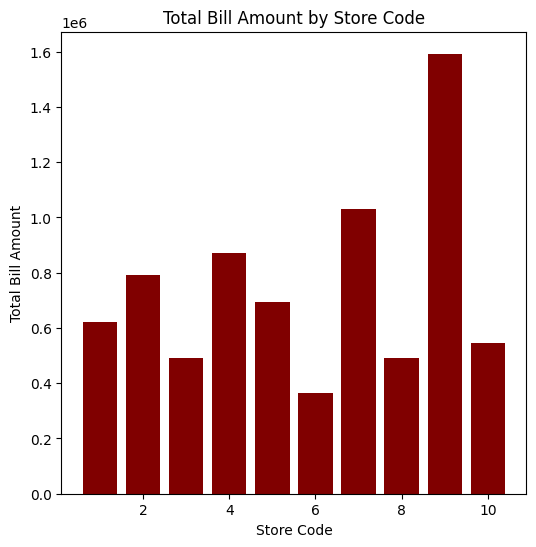

In [25]:
df = new_working_data  # Load your DataFrame from a file if needed


# Extract numerical part from 'STORECODE' and convert it to int
df['STORECODE'] = df['STORECODE'].astype(str).str.extract('(\d+)').astype(int)

# Aggregate bill amounts by store code
store_sales = df.groupby('STORECODE')['BILL_AMT'].sum().reset_index()

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(store_sales['STORECODE'], store_sales['BILL_AMT'], color='maroon')
plt.xlabel('Store Code')
plt.ylabel('Total Bill Amount')
plt.title('Total Bill Amount by Store Code')
plt.show()

In [ ]:
#TOTAL SALES OF EACH GROUP

In [28]:
brand_sales = df.groupby('GRP')['BILL_AMT'].sum().reset_index()

# Displaying the total bill amount by brand
print(brand_sales)

                           GRP   BILL_AMT
0          AFTER SHAVE LOTIONS     720.00
1       AGARBATTI & DHOOPBATTI   36940.30
2     ALL AIR FRESHNERS(01/03)   41465.50
3             ALL IODISED SALT  148140.40
4                     ANTACIDS    5794.35
..                         ...        ...
75               TOOTH POWDERS    4416.41
76                 TWIN BLADES    9545.56
77  VANASPATI CONS PACK (8/94)   22151.45
78         VERMICELLI & NOODLE  212899.12
79     WASHING POWDERS/LIQUIDS  471847.59

[80 rows x 2 columns]


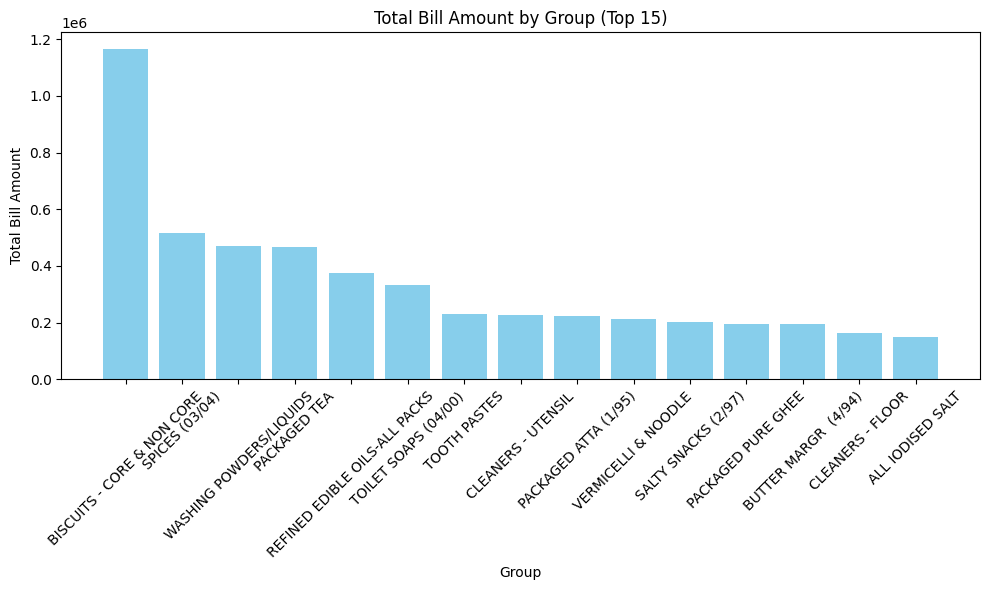

In [66]:


# Assuming brand_sales is your DataFrame containing total bill amount by group

# Sort the DataFrame by 'BILL_AMT' in descending order and select the top 15 groups
top_groups = brand_sales.sort_values(by='BILL_AMT', ascending=False).head(15)

# Plotting the bar chart for the top 15 groups
plt.figure(figsize=(10, 6))
plt.bar(top_groups['GRP'], top_groups['BILL_AMT'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Total Bill Amount')
plt.title('Total Bill Amount by Group (Top 15)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


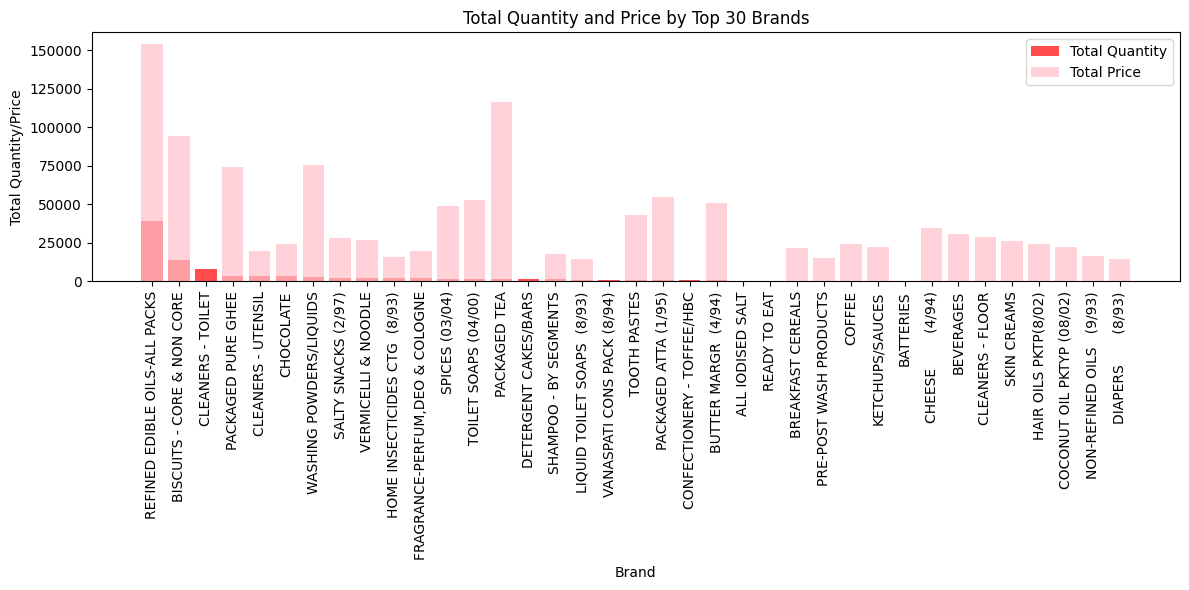

In [70]:
# Sort the DataFrame by 'QTY' or 'PRICE' (whichever you prefer) in descending order and select the top 30 companies
top_companies_qty = brand_totals.sort_values(by='QTY', ascending=False).head(30)
top_companies_price = brand_totals.sort_values(by='PRICE', ascending=False).head(30)

# Plotting total quantity and total price by brand for the top 30 companies
plt.figure(figsize=(12, 6))

# Plotting total quantity
plt.bar(top_companies_qty['GRP'], top_companies_qty['QTY'], color='red', alpha=0.7, label='Total Quantity')

# Plotting total price
plt.bar(top_companies_price['GRP'], top_companies_price['PRICE'], color='pink', alpha=0.7, label='Total Price')

plt.xlabel('Brand')
plt.ylabel('Total Quantity/Price')
plt.title('Total Quantity and Price by Top 30 Brands')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#CORRELATION GRAPH FOR QUNATITY AND PRICE
#IF THE GRAPH IS POSITIVE, the quantity of products sold increases, the price tends to increase.
#IF THE GRAPH IS NEGATIVE, the quantity of products sold increases, the price tends to decrease.

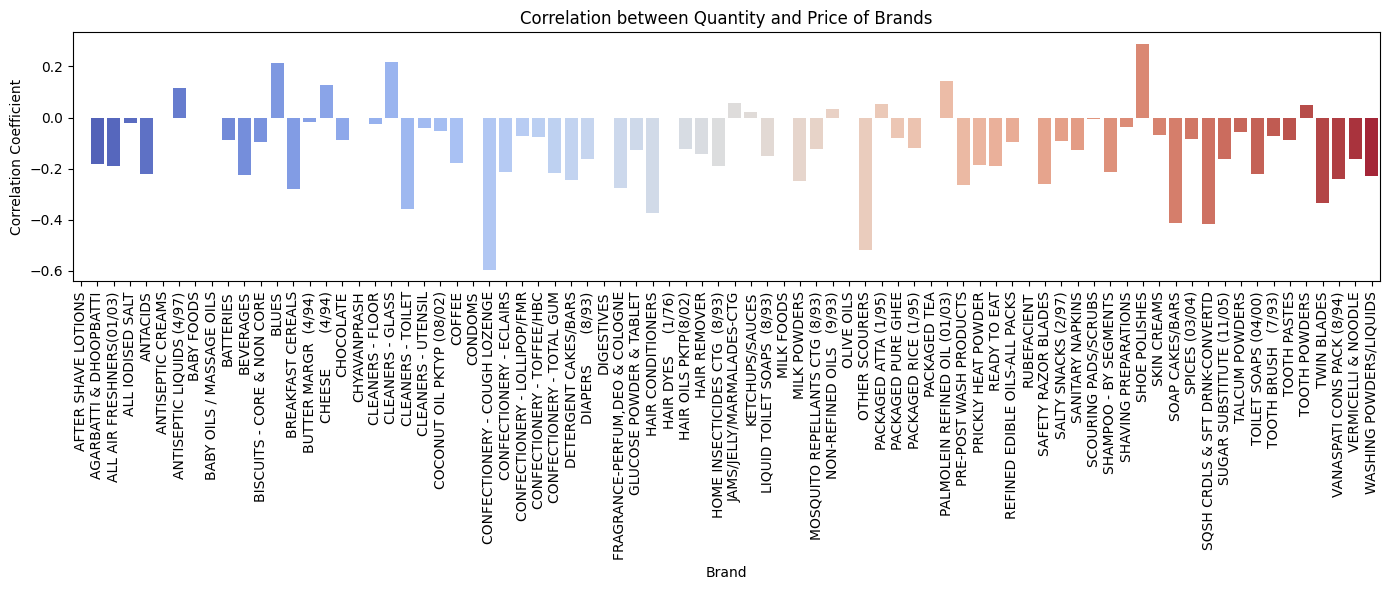

In [55]:
brand_correlation = df.groupby('GRP')[['QTY', 'PRICE']].corr().iloc[0::2,-1].reset_index()

# Plot the correlation coefficients
plt.figure(figsize=(14, 6))
sns.barplot(x='GRP', y='PRICE', data=brand_correlation, palette='coolwarm')
plt.xlabel('Brand')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Quantity and Price of Brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()